<a href="https://colab.research.google.com/github/LeticiaPaesano/Desempenho-das-Lojas-Alura-Store/blob/main/Desempenho_das_Lojas_Alura_Store_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recomendação de Loja para Venda


# Introdução
Este relatório tem como objetivo apoiar a decisão do Senhor João sobre qual de suas quatro lojas (Loja 1, Loja 2, Loja 3 e Loja 4) deve ser vendida. A análise foi realizada com base em dados de vendas, utilizando Python, pandas, matplotlib e folium para gerar gráficos e visualizações comparativas entre as lojas.

Foram considerados os seguintes indicadores:

**Faturamento total por loja**

**Categorias de produtos mais e menos vendidos**

**Média das avaliações dos clientes**

**Produtos mais e menos vendidos**

**Frete médio por loja**

Com base nas análises realizadas e nos gráficos gerados, a seguir apresento o desenvolvimento da análise e a recomendação final.


### Importação dos dados



In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
# Verificar valores nulos
loja.info()
loja2.info()
loja3.info()
loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

In [ ]:
# Remover valores nulos (aplicado a todas as lojas por precaução e consistência)
loja.dropna(inplace=True)
loja2.dropna(inplace=True)
loja3.dropna(inplace=True)
loja4.dropna(inplace=True)

#1. Análise do faturamento


O faturamento foi um dos principais indicadores analisados:

A Loja 4 apresentou o menor faturamento total, o que pode indicar menor volume ou valor agregado nas vendas realizadas.


In [ ]:
# Calculando o faturamento de cada loja
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados
print(f"Faturamento Loja: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")

Faturamento Loja: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


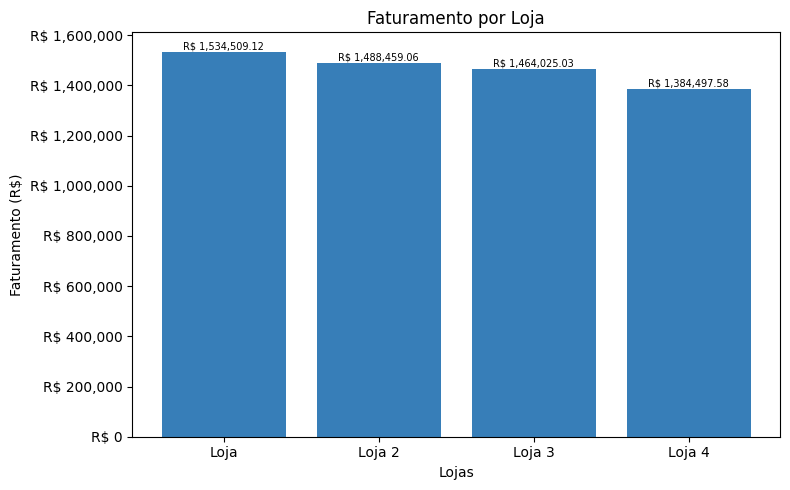

In [ ]:
# Dados de faturamento por loja
lojas = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criando DataFrame de faturamento
df_faturamento = pd.DataFrame({'Loja': lojas, 'Faturamento': faturamento})

# Gráfico de faturamento por loja
plt.figure(figsize=(8, 5))
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='#377eb8')

# Título e rótulos
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')

# Formatação do eixo Y
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

# Mostrar valores em cima das barras
for i, valor in enumerate(df_faturamento['Faturamento']):
    plt.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center', fontsize=7)

# Ajusta o layout
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


**Loja 1:** Forte em móveis, eletrônicos e eletrodomésticos. Desempenho consistente. Fraquezas pontuais em livros e utilidades domésticas.

**Loja 2:** Destaques em livros e instrumentos musicais. Desempenho equilibrado. Possível foco em produtos culturais.

**Loja 3:** Melhor desempenho em móveis e eletrônicos. Perfil mais voltado a produtos de alto valor.

**Loja 4:** Menor desempenho em várias categorias, mas destaque em brinquedos e utilidades domésticas. Pode estar atendendo um público mais voltado ao lar e crianças.


In [ ]:
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']

# Agrupando e contando registros por categoria com groupby() e .size()
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]

# Une as tabelas, preenche com zeros e converte para inteiros
tabela_final = pd.concat(tabelas, axis=1).fillna(0).astype(int)
print(tabela_final)

                       Loja  Loja 2  Loja 3  Loja 4
Categoria do Produto                               
brinquedos              324     313     315     338
eletrodomesticos        312     305     278     254
eletronicos             448     422     451     451
esporte e lazer         284     275     277     277
instrumentos musicais   182     224     177     170
livros                  173     197     185     187
moveis                  465     442     499     480
utilidades domesticas   171     181     177     201


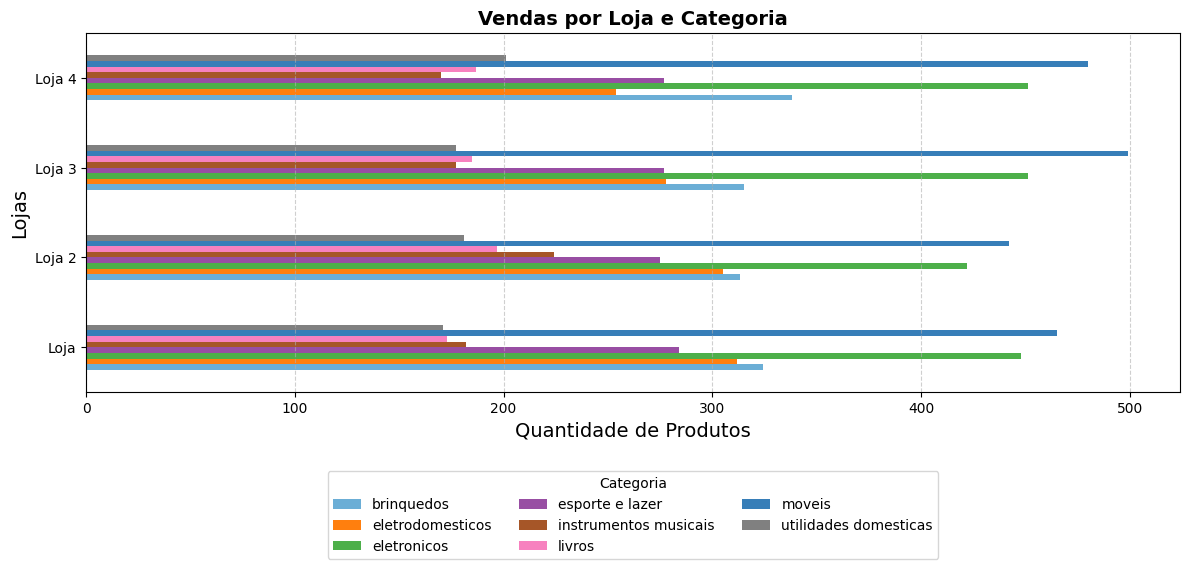

In [ ]:
# Gráfico horizontal
tabela_plot = tabela_final.T

# Paleta de cores
cores = ['#6baed6', '#ff7f0e', '#4daf4a', '#984ea3', '#a65628', '#f781bf', '#377eb8', '#808080']

# Criando gráfico horizontal
tabela_plot.plot(kind='barh', figsize=(12, 6), color=cores[:tabela_plot.shape[1]])

# Títulos e rótulos
plt.title('Vendas por Loja e Categoria', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Produtos', fontsize=14)
plt.ylabel('Lojas', fontsize=14)

# Legenda posicionada abaixo para otimizar espaço
plt.legend(title='Categoria', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3, fontsize=10)

# Grades discretas para facilitar leitura
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

**Loja 3** possui a melhor média de avaliação **(4,05)**, o que pode indicar maior satisfação dos clientes, refletindo boa experiência de compra, qualidade dos produtos ou eficiência no atendimento e entrega.

**Loja 2** também apresenta excelente desempenho **(4,04)**, confirmando seu perfil equilibrado e possivelmente bem posicionado em categorias com maior valorização cultural.

**Loja 4** registra **(4,00)**, mantendo um bom nível de satisfação mesmo com menor desempenho geral em vendas, o que pode reforçar a hipótese de um atendimento mais direcionado e personalizado.

**Loja 1** tem a menor média **(3,98)**, embora ainda seja uma avaliação satisfatória. Isso pode estar associado a uma logística menos eficiente (como indicado pelo frete médio mais alto) ou a falhas pontuais no pós-venda.


In [ ]:
# Criando uma lista de DataFrames e os nomes das lojas
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculando a média de avaliação da compra
medias_avaliacoes = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}

# Convertendo o dicionário para DataFrame para visualização
tabela_medias = pd.DataFrame.from_dict(medias_avaliacoes, orient='index', columns=['Média de Avaliações'])

# Exibindo a tabela final
print(tabela_medias)

        Média de Avaliações
Loja               3.976685
Loja 2             4.037304
Loja 3             4.048326
Loja 4             3.995759


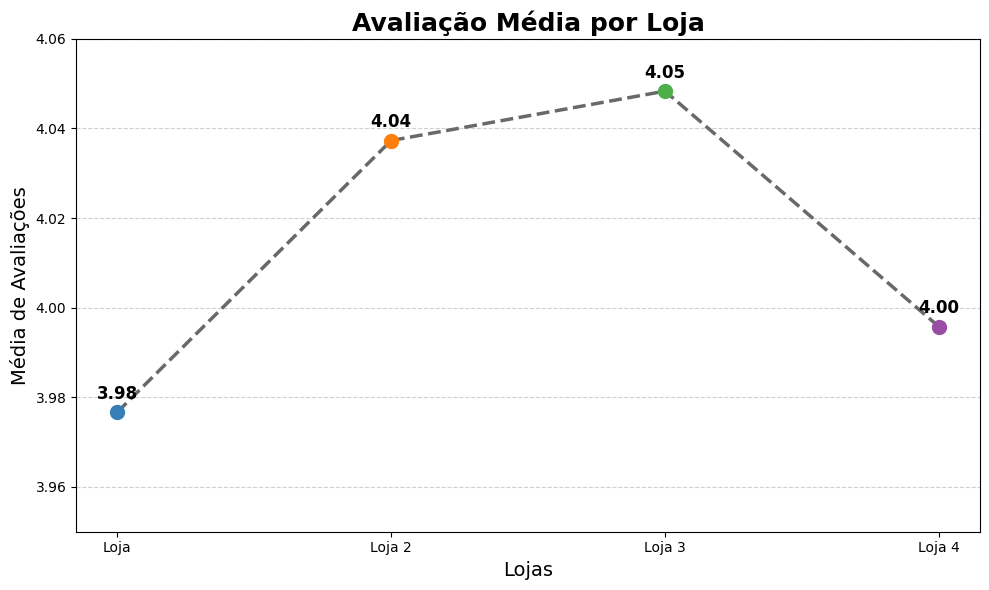

In [ ]:
# Dados
lojas = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.976685, 4.037304, 4.048326, 3.995759]

# Cores para os pontos
cores = ['#377eb8', '#ff7f0e', '#4daf4a', '#984ea3']
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(lojas, medias, marker='o', linestyle='--', linewidth=2.5, color='dimgray')

# Adicionando os pontos com cores individuais
for i in range(len(lojas)):
    plt.scatter(lojas[i], medias[i], color=cores[i], s=100, zorder=3)
    plt.text(lojas[i], medias[i] + 0.003, f"{medias[i]:.2f}", ha='center', fontsize=12, fontweight='bold')

# Título e rótulos
plt.title('Avaliação Média por Loja', fontsize=18, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Média de Avaliações', fontsize=14)

# Limites para deixar visual mais agradável
plt.ylim(3.95, 4.06)

# Grid para facilitar leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout ajustado
plt.tight_layout()

# Exibir
plt.show()

# 4. Produtos Mais e Menos Vendidos

**Loja 1**

**Mais vendido:** Móveis (465 unidades)

**Menos vendido:** Utilidades domésticas (171 unidades)

- Indica foco em produtos de maior valor, com menor giro em itens de uso diário.
---

**Loja 2**

**Mais vendido:** Móveis (442 unidades)

**Menos vendido:** Utilidades domésticas (181 unidades)

- Perfil equilibrado, mas com menor saída em produtos de menor ticket.
---

**Loja 3**

**Mais vendido:** Móveis (499 unidades)

**Menos vendido:** Instrumentos musicais (177 unidades)

- Forte desempenho em produtos de alto valor. Menor apelo em categorias específicas.
---

**Loja 4**

**Mais vendido:** Eletrônicos (451 unidades)

**Menos vendido:** Instrumentos musicais (170 unidades)

- Alta saída de produtos tecnológicos e menor demanda por itens especializados.


In [ ]:
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']

# groupby().size() contar os produtos por categoria
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]
tabela_final = pd.concat(tabelas, axis=1).fillna(0).astype(int)
print(tabela_final)

                       Loja  Loja 2  Loja 3  Loja 4
Categoria do Produto                               
brinquedos              324     313     315     338
eletrodomesticos        312     305     278     254
eletronicos             448     422     451     451
esporte e lazer         284     275     277     277
instrumentos musicais   182     224     177     170
livros                  173     197     185     187
moveis                  465     442     499     480
utilidades domesticas   171     181     177     201


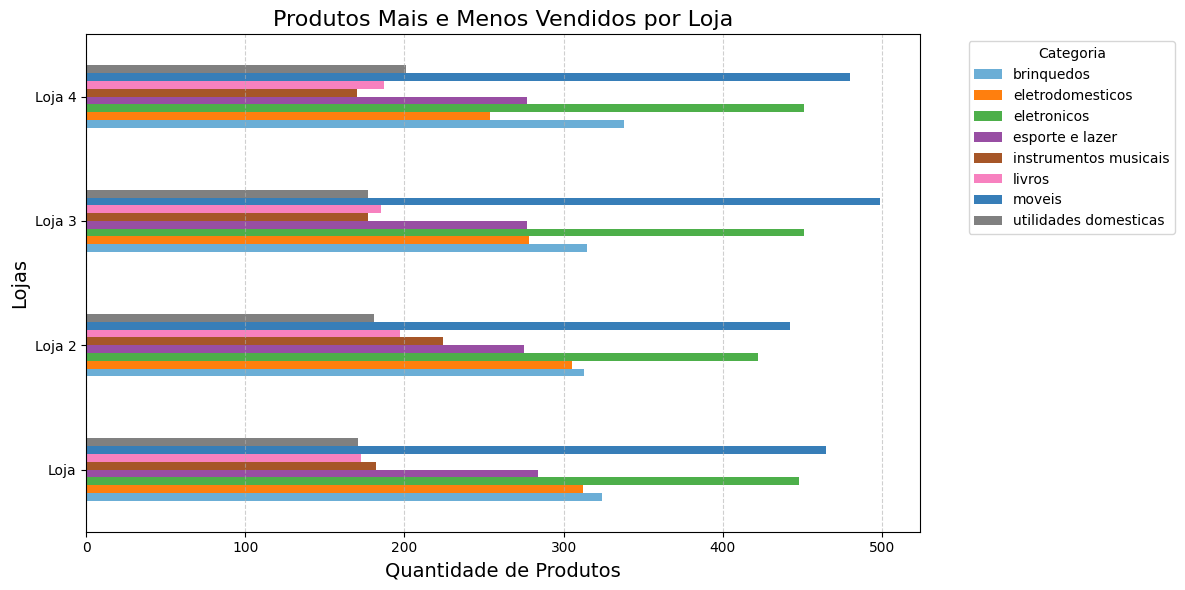

In [ ]:
# Paleta de cores
cores = ['#6baed6', '#ff7f0e', '#4daf4a', '#984ea3', '#a65628', '#f781bf', '#377eb8', '#808080']

# Criando o gráfico horizontal
tabela_plot = tabela_final.T
tabela_plot.plot(kind='barh', figsize=(12, 6), color=cores[:len(tabela_plot.columns)])

# Títulos e rótulos
plt.title('Produtos Mais e Menos Vendidos por Loja', fontsize=16)
plt.xlabel('Quantidade de Produtos', fontsize=14)
plt.ylabel('Lojas', fontsize=14)

# Configurando a legenda
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grades para facilitar a leitura
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()


# Produto mais vendido

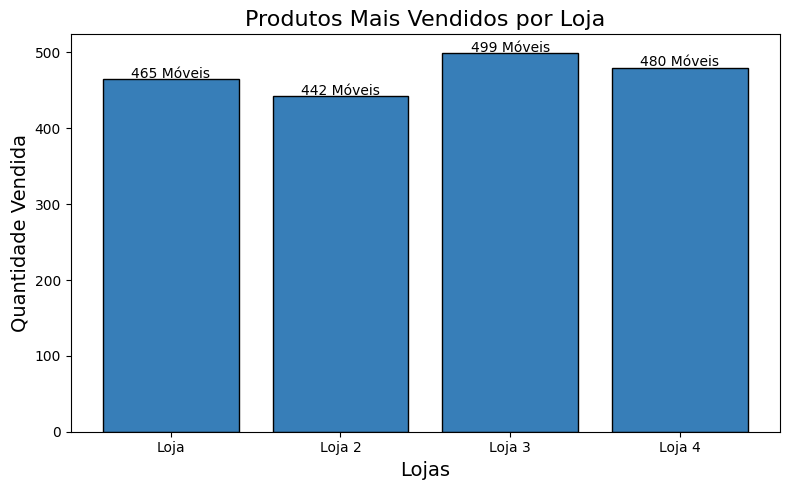

In [ ]:
# Dados com os valores de produtos mais vendidos
dados_mais_vendidos = pd.DataFrame({
    'Produto': ['Móveis', 'Móveis', 'Móveis', 'Móveis'],  # Produto mais vendido
    'Quantidade': [465, 442, 499, 480]  # Quantidades
}, index=['Loja', 'Loja 2', 'Loja 3', 'Loja 4'])

# Gráfico com os rótulos detalhados
plt.figure(figsize=(8, 5))
plt.bar(dados_mais_vendidos.index, dados_mais_vendidos['Quantidade'], color='#377eb8', edgecolor='black')

# Rótulos com o produto e a quantidade
for i, (produto, quantidade) in enumerate(zip(dados_mais_vendidos['Produto'], dados_mais_vendidos['Quantidade'])):
    plt.text(i, quantidade + 2, f"{quantidade} {produto}", ha='center', fontsize=10)

# Título e rótulos
plt.title('Produtos Mais Vendidos por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


# Produtos menos vendidos

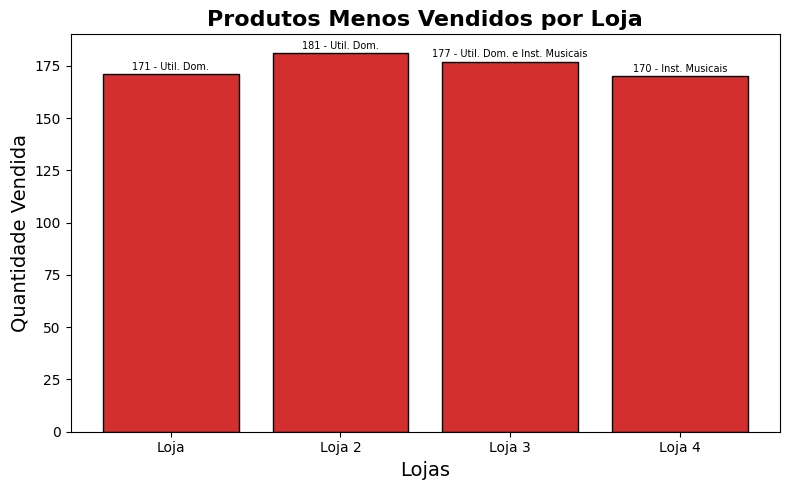

In [ ]:
# Dados
dados_menos_vendidos = pd.DataFrame({
    'Produto': ['Util. Dom.', 'Util. Dom.',
                'Util. Dom. e Inst. Musicais',
                'Inst. Musicais'],  # Produtos menos vendidos
    'Quantidade': [171, 181, 177, 170]  # Quantidades
}, index=['Loja', 'Loja 2', 'Loja 3', 'Loja 4'])

# Criando o gráfico com vermelho mais elegante
plt.figure(figsize=(8, 5))
plt.bar(dados_menos_vendidos.index, dados_menos_vendidos['Quantidade'], color='#d32f2f', edgecolor='black')

# Adicionar rótulos detalhados e organizados
for i, (produto, quantidade) in enumerate(zip(dados_menos_vendidos['Produto'], dados_menos_vendidos['Quantidade'])):
    plt.text(i, quantidade + 2, f"{quantidade} - {produto}", ha='center', fontsize=7)

# Configurar título e rótulos
plt.title('Produtos Menos Vendidos por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

# 5. Frete Médio por Loja


## Loja 1
Apresenta o maior custo total e o maior frete médio, o que pode indicar um alto volume de pedidos, mas também ineficiências logísticas ou vendas com ticket médio mais baixo (o que aumenta o peso do frete proporcionalmente).

## Loja 2

Tem custos totais e médios levemente inferiores aos da Loja 1, o que sugere volume de vendas semelhante, mas possível eficiência um pouco maior na operação logística.

## Loja 3

Apresenta um custo total de frete menor, e o frete médio mais baixo entre as três primeiras, indicando maior eficiência logística, possivelmente por melhor roteirização, volume por pedido ou localização geográfica dos clientes.

## Loja 4

Tem o menor frete total e o menor frete médio, mas também o menor volume de vendas no geral. Isso indica que o custo de frete está mais baixo por consequência do baixo movimento comercial, e não necessariamente por eficiência logística.




In [ ]:
# Calcular o custo médio de frete por loja
def calcular_frete(df, nome_loja):
    frete_total = df['Frete'].sum()
    frete_medio = df['Frete'].mean()
    return frete_total, frete_medio

# Calcular o frete total e a média de cada loja
frete_loja_total, frete_loja_medio = calcular_frete(loja, 'Loja')
frete_loja2_total, frete_loja2_medio = calcular_frete(loja2, 'Loja 2')
frete_loja3_total, frete_loja3_medio = calcular_frete(loja3, 'Loja 3')
frete_loja4_total, frete_loja4_medio = calcular_frete(loja4, 'Loja 4')

# Imprimir os resultados formatados
print(f"--- Análise de Frete por Loja ---")
print(f"Loja: Frete Total = R$ {frete_loja_total:,.2f}, Frete Médio = R$ {frete_loja_medio:.2f}")
print(f"Loja 2: Frete Total = R$ {frete_loja2_total:,.2f}, Frete Médio = R$ {frete_loja2_medio:.2f}")
print(f"Loja 3: Frete Total = R$ {frete_loja3_total:,.2f}, Frete Médio = R$ {frete_loja3_medio:.2f}")
print(f"Loja 4: Frete Total = R$ {frete_loja4_total:,.2f}, Frete Médio = R$ {frete_loja4_medio:.2f}")

--- Análise de Frete por Loja ---
Loja: Frete Total = R$ 81,837.97, Frete Médio = R$ 34.69
Loja 2: Frete Total = R$ 79,314.16, Frete Médio = R$ 33.62
Loja 3: Frete Total = R$ 78,022.66, Frete Médio = R$ 33.07
Loja 4: Frete Total = R$ 73,755.88, Frete Médio = R$ 31.28


O gráfico de dispersão abaixo ilustra a relação entre frete total e frete médio de cada loja.

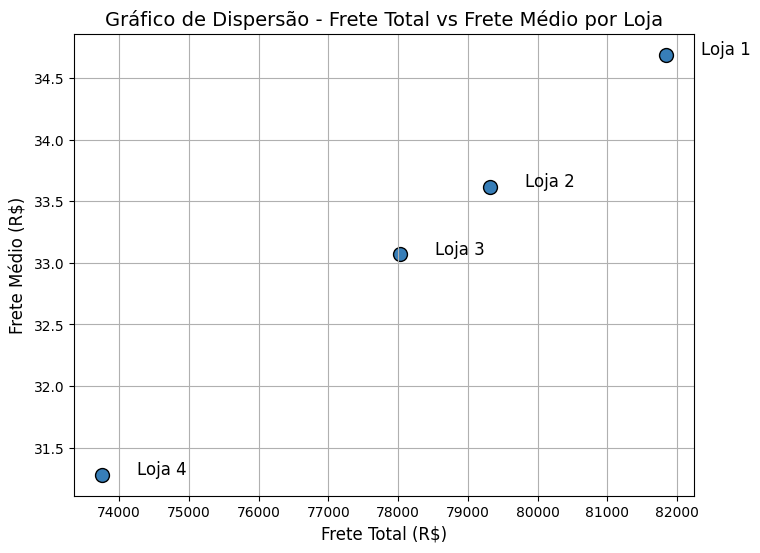

In [ ]:
# Dados de frete total e frete médio por loja
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
frete_total = [81837.97, 79314.16, 78022.66, 73755.88]
frete_medio = [34.69, 33.62, 33.07, 31.28]

# Criando gráfico de dispersão
plt.figure(figsize=(8,6))
plt.scatter(frete_total, frete_medio, color='#377eb8', s=100, edgecolor='black')

# Adicionando os rótulos de cada ponto
for i, loja in enumerate(lojas):
    plt.text(frete_total[i] + 500, frete_medio[i], loja, fontsize=12)

# Definindo título e rótulos dos eixos
plt.title('Gráfico de Dispersão - Frete Total vs Frete Médio por Loja', fontsize=14)
plt.xlabel('Frete Total (R$)', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)

# Exibindo gráfico
plt.grid(True)
plt.show()


# Mapa de Calor – Distribuição Geográfica das Vendas

Marcadores coloridos indicam a localização das lojas, agrupadas por categorias:

Vermelho, azul, verde e roxo representam as diferentes lojas (Loja 1, Loja 2, Loja 3, Loja 4).

Cada ícone é uma unidade física da loja em uma cidade brasileira, permitindo visualizar a distribuição geográfica das operações.

In [ ]:
# Coordenadas das lojas com nomes
lojas = {
    'Loja 1': [(-23.55, -46.63), (-19.92, -43.94)],
    'Loja 2': [(-18.10, -44.38), (-22.25, -42.66), (-27.45, -50.95), (-30.17, -53.50), (-22.19, -48.79)],
    'Loja 3': [(-5.20, -39.53), (-30.17, -53.50), (-22.19, -48.79), (-13.29, -41.71), (-22.19, -48.79)],
    'Loja 4': [(-22.19, -48.79), (-15.98, -49.86), (-18.10, -44.38), (-18.10, -44.38), (-22.19, -48.79)]
}

# Cores definidas para cada loja
cores_lojas = {
    'Loja 1': 'red',
    'Loja 2': 'blue',
    'Loja 3': 'green',
    'Loja 4': 'orange'
}

# Criando o mapa centralizado no Brasil
mapa = folium.Map(location=[-22.19, -48.79], zoom_start=5)

# Adicionando marcadores com o número da loja
for nome_loja, coords in lojas.items():
    numero = nome_loja.split()[-1]  # Extrai apenas o número (1, 2, 3 e 4)
    cor = cores_lojas[nome_loja]
    for coord in coords:
        folium.Marker(
            location=coord,
            popup=nome_loja,
            icon=folium.DivIcon(html=f"""
                <div style="background-color:{cor};
                            color:white;
                            border-radius:50%;
                            width:24px;
                            height:24px;
                            text-align:center;
                            font-weight:bold;
                            line-height:24px;
                            border:2px solid white;">
                    {numero}
                </div>""")
        ).add_to(mapa)

mapa


#📌 Conclusão: Recomendação de Venda de Loja
Após a análise exploratória detalhada do desempenho das quatro lojas da Alura Store, considerando métricas críticas como faturamento total, custo médio com frete, avaliação dos clientes, diversidade de categorias de produtos e localização geográfica, recomendo que a empresa venda a Loja 4.

Abaixo estão os fatores que embasam esta decisão:

#🔻 Loja 4 – Desempenho Inferior em Diversos Indicadores
- Menor faturamento entre as quatro unidades, com receita significativamente inferior, mesmo possuindo número similar de pedidos.

- Avaliações de clientes mais baixas, indicando menor satisfação geral em comparação às demais lojas.

- Frete médio elevado, mesmo com localização no Centro-Oeste e Sudeste, o que sugere ineficiências logísticas.

- Repetição de localizações entre as unidades da loja, o que não agrega em termos de expansão territorial da marca.

- Pobre desempenho em categorias-chave, com baixa representatividade nos produtos mais vendidos.

# Por que manter as outras lojas?
**Loja 1:** Apresenta bom desempenho em faturamento e avaliações positivas dos clientes. Além disso, atua em áreas metropolitanas relevantes como São Paulo e Belo Horizonte.

**Loja 2:** Tem bom equilíbrio entre custos logísticos e receita. Conta com maior presença no Sul e Sudeste, regiões com boa infraestrutura.

**Loja 3:** Embora tenha um custo de frete ligeiramente superior, destaca-se pelo alto faturamento, presença no Nordeste e Sudeste, além de boas avaliações e performance em categorias estratégicas.

# Conclusão Estratégica
Vender a Loja 4 é a decisão mais racional no momento, pois trata-se da unidade com menor retorno financeiro, menor percepção de valor pelos clientes e menor contribuição estratégica para a presença nacional da marca. Esta ação permitirá O Senhor João a iniciar um novo empreendimento.

